In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import geopandas as gpd
%matplotlib inline
import sys
sys.path.append('../')

from intersections_and_roads import *
from shapely.geometry import *
import ast

In [2]:
street_centerlines = gpd.read_file('./San_Francisco_Basemap_Street_Centerlines_min.json')
street_centerlines_csv = pd.read_csv('./San_Francisco_Basemap_Street_Centerlines.csv')

In [3]:
street_centerlines_csv.head()
street_centerlines_csv['id'] = range(street_centerlines_csv.shape[0])

In [4]:
street_centerlines_csv['ToNode'] = street_centerlines_csv['t_node_cnn']
street_centerlines_csv['FromNode'] = street_centerlines_csv['f_node_cnn']

In [5]:
intersections_points = gpd.read_file('./street_intersections.geojson')
intersections_points_csv = pd.read_csv('./street_intersections.csv')
intersections_streets = pd.read_csv('./List_of_Streets_and_Intersections.csv')

In [6]:
intersections_streets.head()

,CNN,streetname,from_st,to_st,cardinal,addrange,limits,location,theOrder,LF_FADD,RT_FADD,LF_TADD,RT_TADD,FROM_CNN,TO_CNN
0,30731000,01ST ST,BUSH ST \ MARKET ST,NaN,NaN,NaN,BUSH ST \ MARKET ST intersection,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,100000,01ST ST,BUSH ST \ MARKET ST,STEVENSON ST,NaN,1 - 34,BUSH ST \ MARKET ST to STEVENSON ST (1 - 34),NaN,2,1.0,2.0,19.0,34.0,30731000.0,24666000.0
2,24666000,01ST ST,STEVENSON ST,NaN,NaN,NaN,STEVENSON ST intersection,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
3,101000,01ST ST,STEVENSON ST,JESSIE ST,NaN,21 - 56,STEVENSON ST to JESSIE ST (21 - 56),NaN,4,21.0,36.0,47.0,56.0,24666000.0,24564000.0
4,24564000,01ST ST,JESSIE ST,NaN,NaN,NaN,JESSIE ST intersection,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
intersections_points.head()

,cnn,cnntext,geometry,st_name,st_type
0,23730000,23730000,POINT (-122.4054541718919 37.75433723137436),UTAH,ST
1,22141000,22141000,POINT (-122.4397477601416 37.73236806396732),JOOST,AVE
2,27966000,27966000,POINT (-122.5109259470119 37.77043567583329),JOHN F KENNEDY,DR
3,21349000,21349000,POINT (-122.4226694452744 37.74394224109009),SAN JOSE,AVE
4,24388000,24388000,POINT (-122.4186182163472 37.77305345411757),MISSION,ST


In [8]:
intersections_points_csv.head()

,CNN,ST_NAME,the_geom,ST_TYPE,CNNTEXT
0,23730000,UTAH,POINT (-122.40545417189192 37.75433723137436),ST,23730000
1,22141000,JOOST,POINT (-122.43974776014164 37.73236806396732),AVE,22141000
2,27966000,JOHN F KENNEDY,POINT (-122.5109259470119 37.77043567583329),DR,27966000
3,21349000,SAN JOSE,POINT (-122.42266944527441 37.74394224109009),AVE,21349000
4,24388000,MISSION,POINT (-122.41861821634723 37.77305345411757),ST,24388000


In [9]:
street_centerlines_csv['geometry'] = street_centerlines['geometry']

In [10]:
street_centerlines_csv.head()

,accepted,classcode,cnn,cnntext,district,f_node_cnn,jurisdicti,layer,lf_fadd,lf_toadd,...,streetname,street_gc,st_type,t_node_cnn,zip_code,geometry,multigeom,id,ToNode,FromNode
0,N,0,15145000,15145000,NaN,26132000,NaN,PRIVATE,0,0,...,CROWN CT,CROWN,CT,54223000,94114,LINESTRING (-122.4469445591637 37.757230818460...,False,0,54223000,26132000
1,Y,0,11305001,11305001,NaN,26255000,DPW,UPROW,1,37,...,SAINT GERMAIN AVE,SAINT GERMAIN,AVE,54224000,94114,LINESTRING (-122.4479385070377 37.757581175982...,False,1,54224000,26255000
2,Y,5,11305002,11305002,NaN,54224000,DPW,STREETS,39,99,...,SAINT GERMAIN AVE,SAINT GERMAIN,AVE,26247000,94114,LINESTRING (-122.4488703331697 37.757518612139...,False,2,26247000,54224000
3,Y,5,13798000,13798000,NaN,35015000,DPW,STREETS,221,299,...,CORONA ST,CORONA,ST,35015000,94127,LINESTRING (-122.4666060905473 37.725923871355...,False,3,35015000,35015000
4,N,5,5389001,5389001,NaN,35016000,DPW,STREETS,0,0,...,FAIRFAX AVE,FAIRFAX,AVE,35017000,94124,LINESTRING (-122.3808625559745 37.736271931010...,False,4,35017000,35016000


In [11]:
names = street_centerlines_csv.filter('street', like='MINNA')

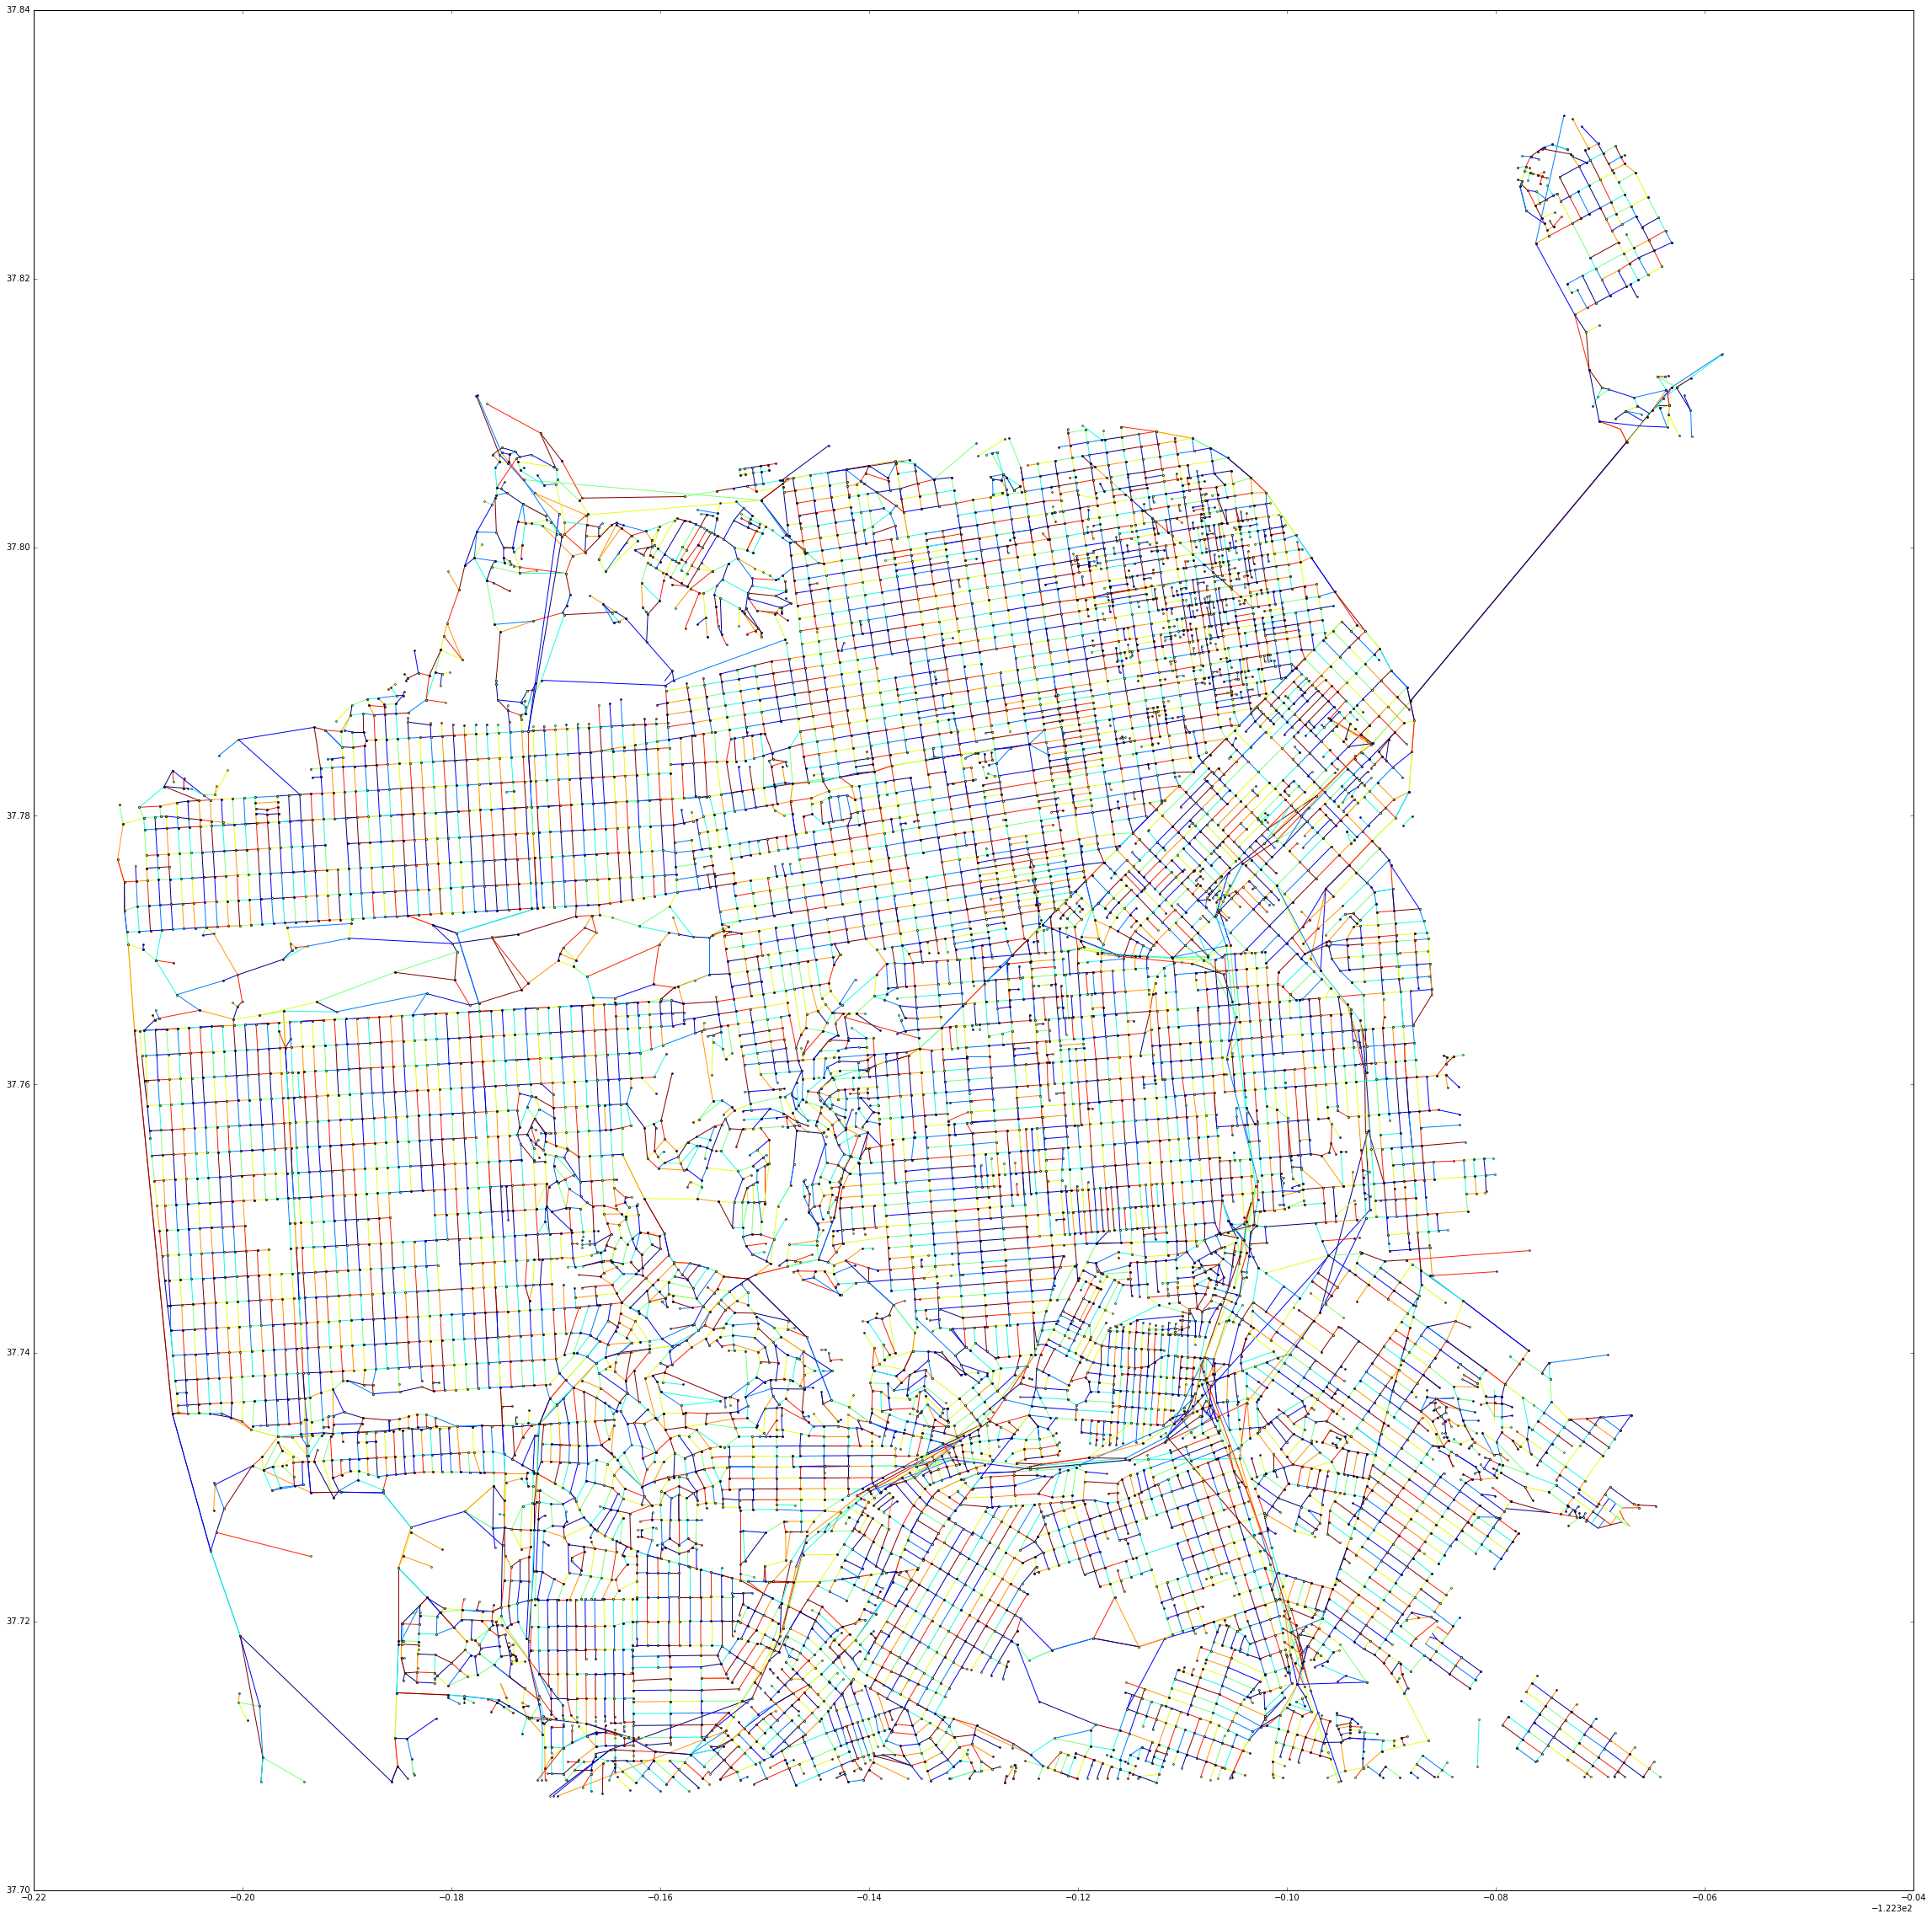

In [223]:
fig, ax = plt.subplots(1,1, figsize=(40,40))
street_centerlines.plot(ax=ax)
intersections_points.plot(ax=ax)

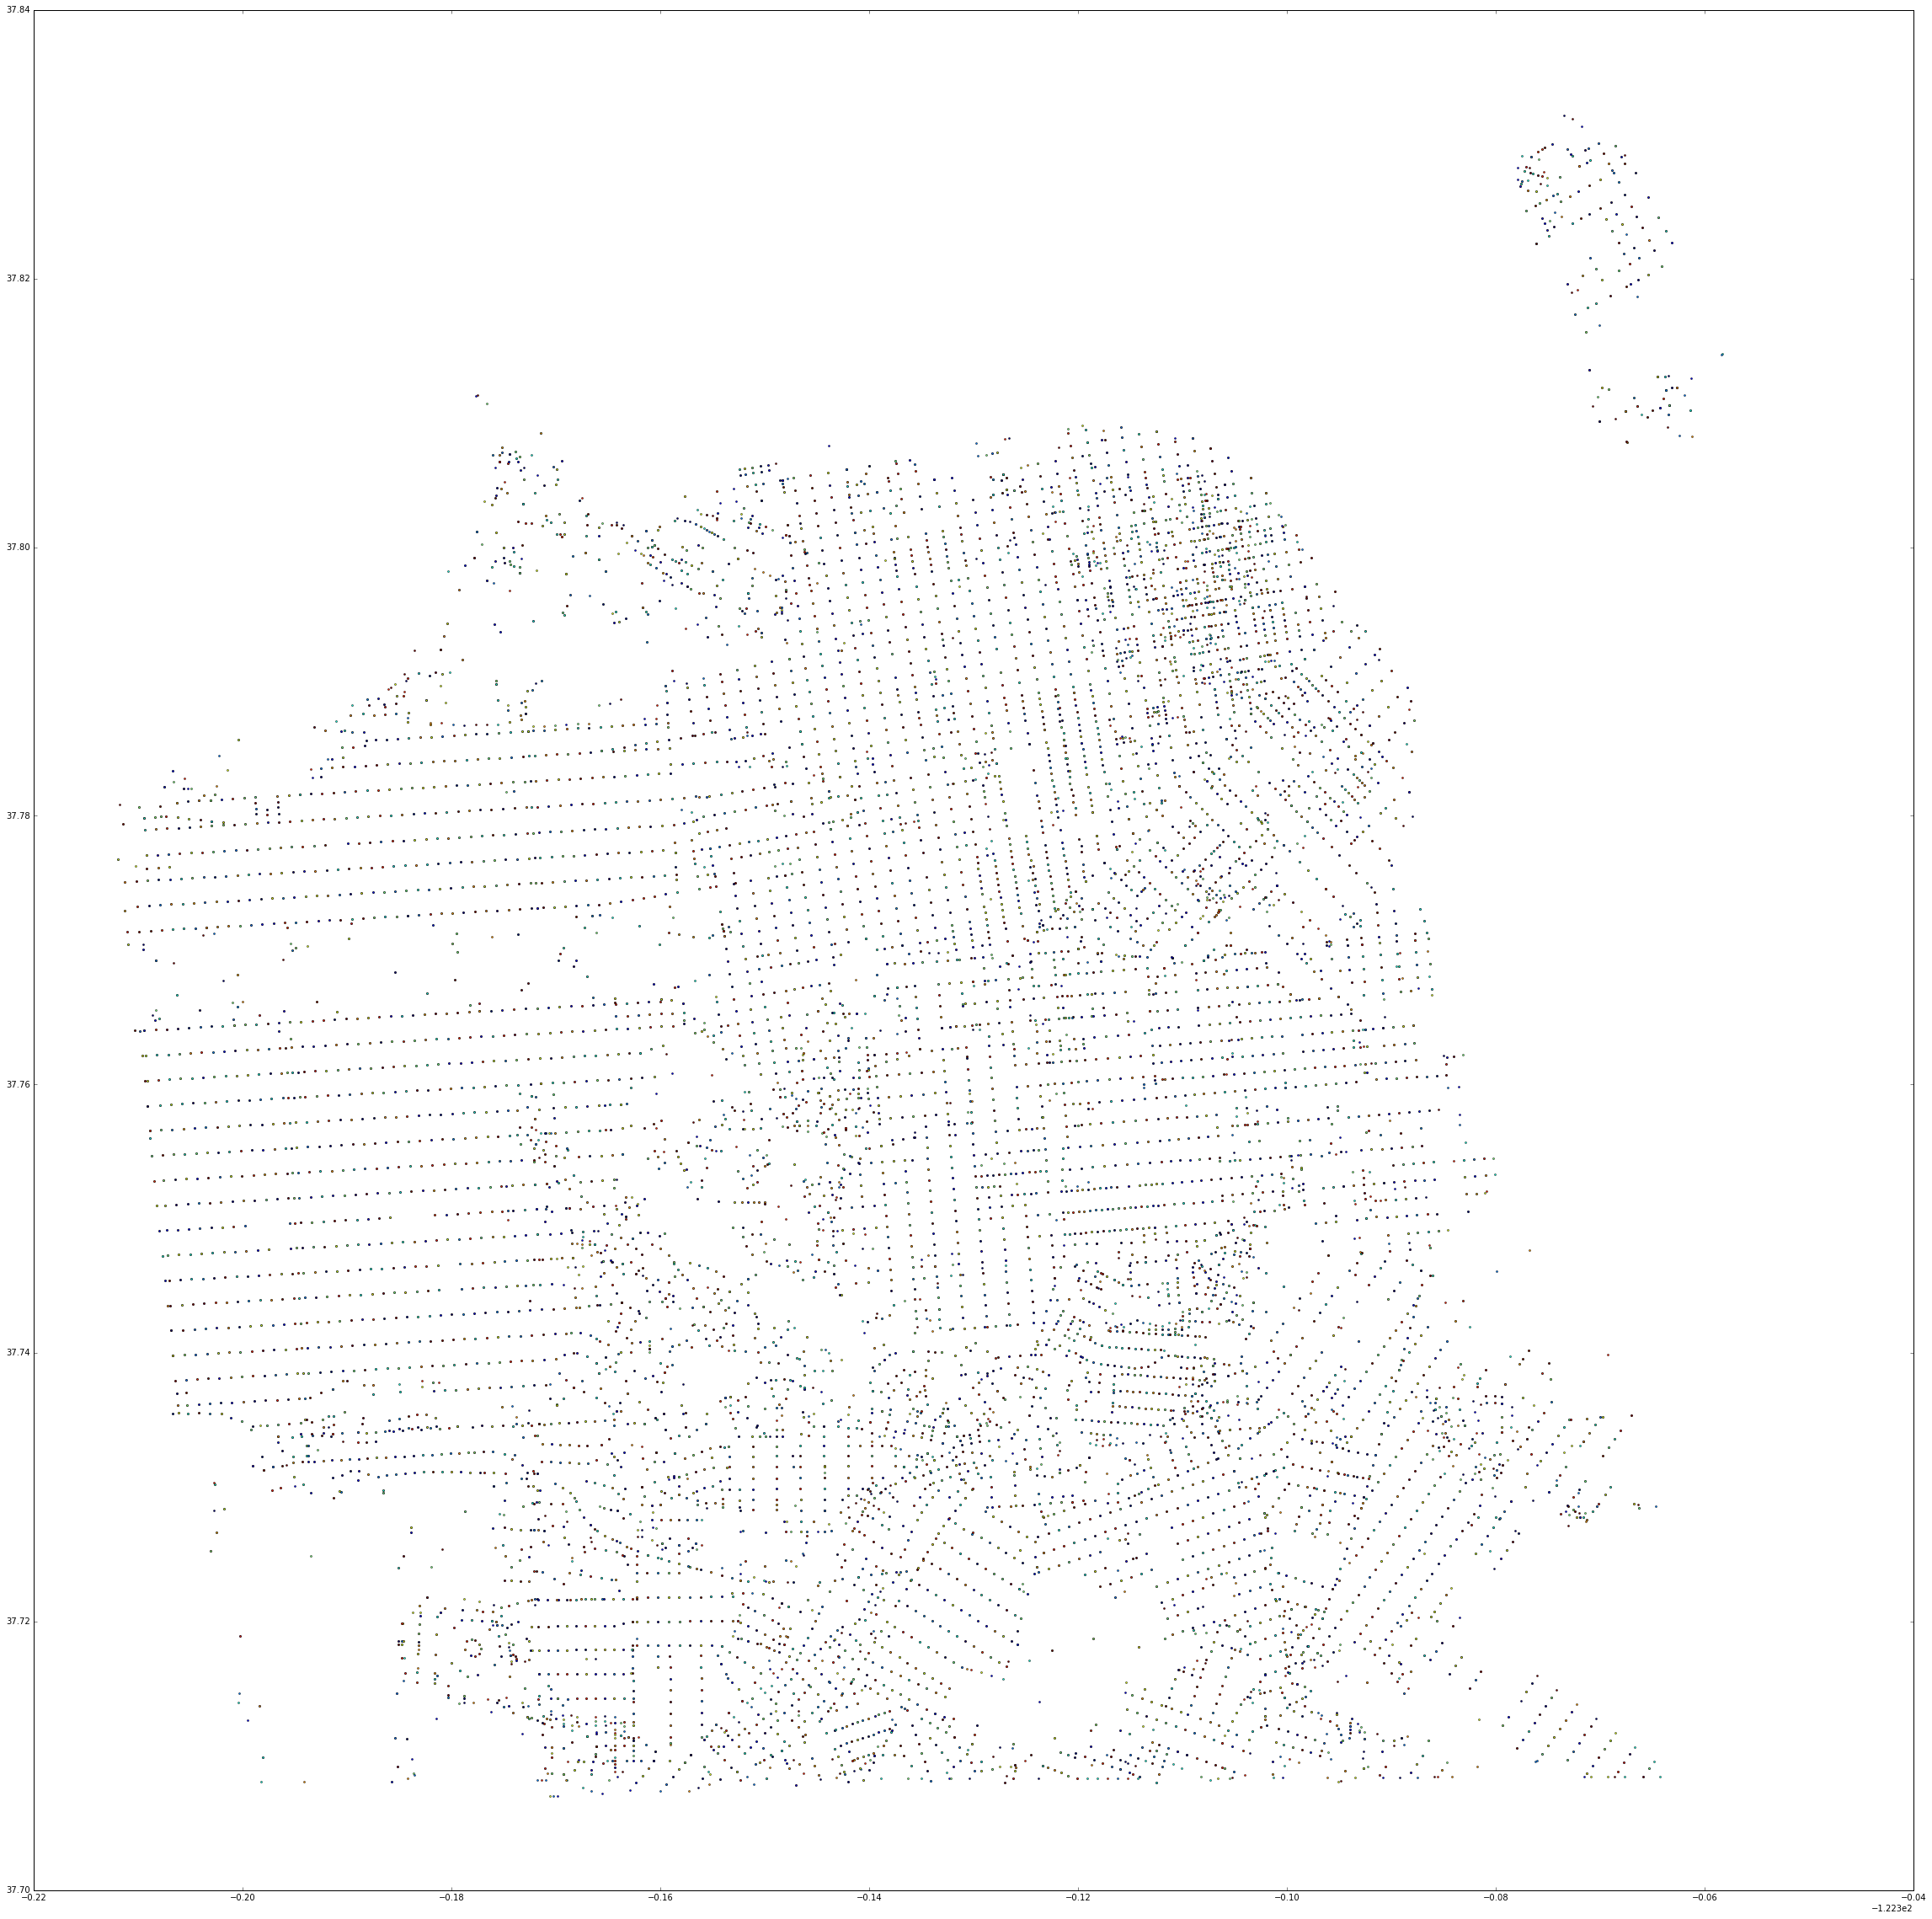

In [229]:
fig, ax = plt.subplots(1,1, figsize=(40,40))
intersections_points.plot(ax=ax)

In [12]:
intersections_streets.head(10)

,CNN,streetname,from_st,to_st,cardinal,addrange,limits,location,theOrder,LF_FADD,RT_FADD,LF_TADD,RT_TADD,FROM_CNN,TO_CNN
0,30731000,01ST ST,BUSH ST \ MARKET ST,NaN,NaN,NaN,BUSH ST \ MARKET ST intersection,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
1,100000,01ST ST,BUSH ST \ MARKET ST,STEVENSON ST,NaN,1 - 34,BUSH ST \ MARKET ST to STEVENSON ST (1 - 34),NaN,2,1.0,2.0,19.0,34.0,30731000.0,24666000.0
2,24666000,01ST ST,STEVENSON ST,NaN,NaN,NaN,STEVENSON ST intersection,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN
3,101000,01ST ST,STEVENSON ST,JESSIE ST,NaN,21 - 56,STEVENSON ST to JESSIE ST (21 - 56),NaN,4,21.0,36.0,47.0,56.0,24666000.0,24564000.0
4,24564000,01ST ST,JESSIE ST,NaN,NaN,NaN,JESSIE ST intersection,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN
5,102000,01ST ST,JESSIE ST,ELIM ALY,NaN,49 - 71,JESSIE ST to ELIM ALY (49 - 71),NaN,6,49.0,58.0,71.0,70.0,24564000.0,24530000.0
6,24530000,01ST ST,ELIM ALY,NaN,NaN,NaN,ELIM ALY intersection,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN
7,103000,01ST ST,ELIM ALY,MISSION ST,NaN,72 - 99,ELIM ALY to MISSION ST (72 - 99),NaN,8,73.0,72.0,99.0,98.0,24530000.0,24563000.0
8,24563000,01ST ST,MISSION ST,NaN,NaN,NaN,MISSION ST intersection,NaN,9,NaN,NaN,NaN,NaN,NaN,NaN
9,104001,01ST ST,MISSION ST,TRANSBAY HUMP,NaN,100 - 114,MISSION ST to TRANSBAY HUMP (100 - 114),NaN,10,101.0,100.0,113.0,114.0,24563000.0,54001000.0


In [13]:
intersections = intersections_streets.merge(intersections_points_csv, on='CNN')
intersections['id'] = range(intersections.shape[0])

In [14]:
intersections.head(10)
intersections['geometry'] = intersections_points['geometry']
zeros = np.chararray((street_centerlines_csv.shape[0]))
zeros[:] = '0'
street_centerlines_csv['Direction'] = zeros

In [15]:
street_centerlines_csv.head(30)

,accepted,classcode,cnn,cnntext,district,f_node_cnn,jurisdicti,layer,lf_fadd,lf_toadd,...,street_gc,st_type,t_node_cnn,zip_code,geometry,multigeom,id,ToNode,FromNode,Direction
0,N,0,15145000,15145000,NaN,26132000,NaN,PRIVATE,0,0,...,CROWN,CT,54223000,94114,LINESTRING (-122.4469445591637 37.757230818460...,False,0,54223000,26132000,0
1,Y,0,11305001,11305001,NaN,26255000,DPW,UPROW,1,37,...,SAINT GERMAIN,AVE,54224000,94114,LINESTRING (-122.4479385070377 37.757581175982...,False,1,54224000,26255000,0
2,Y,5,11305002,11305002,NaN,54224000,DPW,STREETS,39,99,...,SAINT GERMAIN,AVE,26247000,94114,LINESTRING (-122.4488703331697 37.757518612139...,False,2,26247000,54224000,0
3,Y,5,13798000,13798000,NaN,35015000,DPW,STREETS,221,299,...,CORONA,ST,35015000,94127,LINESTRING (-122.4666060905473 37.725923871355...,False,3,35015000,35015000,0
4,N,5,5389001,5389001,NaN,35016000,DPW,STREETS,0,0,...,FAIRFAX,AVE,35017000,94124,LINESTRING (-122.3808625559745 37.736271931010...,False,4,35017000,35016000,0
5,N,5,5389002,5389002,NaN,35017000,DPW,STREETS,0,0,...,FAIRFAX,AVE,20182000,94124,LINESTRING (-122.3810023298943 37.736772441755...,False,5,20182000,35017000,0
6,N,5,15146000,15146000,NaN,35016000,DPW,STREETS,300,398,...,CATALINA,ST,54227000,94124,LINESTRING (-122.3808625559745 37.736271931010...,False,6,54227000,35016000,0
7,N,5,15147000,15147000,NaN,35018000,DPW,STREETS,200,298,...,CATALINA,ST,35016000,94124,LINESTRING (-122.380117095069 37.7362594182416...,False,7,35016000,35018000,0
8,N,5,15148000,15148000,NaN,20172000,DPW,STREETS,100,198,...,CATALINA,ST,35018000,94124,LINESTRING (-122.3794337559056 37.736259418241...,False,8,35018000,20172000,0
9,N,5,15149000,15149000,NaN,35019000,DPW,STREETS,200,298,...,ACACIA,AVE,35017000,94124,LINESTRING (-122.380117095069 37.7367724417553...,False,9,35017000,35019000,0


In [16]:
intersections['geometry'][0].x

-122.40545417189192

In [17]:
intersections['NodeNumber'] = intersections['CNN']
intersections.head(30)

,CNN,streetname,from_st,to_st,cardinal,addrange,limits,location,theOrder,LF_FADD,...,RT_TADD,FROM_CNN,TO_CNN,ST_NAME,the_geom,ST_TYPE,CNNTEXT,id,geometry,NodeNumber
0,30731000,01ST ST,BUSH ST \ MARKET ST,NaN,NaN,NaN,BUSH ST \ MARKET ST intersection,NaN,1,NaN,...,NaN,NaN,NaN,MARKET,POINT (-122.39914859815619 37.79101664900084),ST,30731000,0,POINT (-122.4054541718919 37.75433723137436),30731000
1,30731000,01ST ST,BUSH ST \ MARKET ST,NaN,NaN,NaN,BUSH ST \ MARKET ST intersection,NaN,1,NaN,...,NaN,NaN,NaN,BUSH,POINT (-122.39914859815619 37.79101664900084),ST,30731000,1,POINT (-122.4397477601416 37.73236806396732),30731000
2,30731000,01ST ST,BUSH ST \ MARKET ST,NaN,NaN,NaN,BUSH ST \ MARKET ST intersection,NaN,1,NaN,...,NaN,NaN,NaN,01ST,POINT (-122.39914859815619 37.79101664900084),ST,30731000,2,POINT (-122.5109259470119 37.77043567583329),30731000
3,30731000,BUSH ST,01ST ST \ MARKET ST,NaN,NaN,NaN,01ST ST \ MARKET ST intersection,NaN,7910,NaN,...,NaN,NaN,NaN,MARKET,POINT (-122.39914859815619 37.79101664900084),ST,30731000,3,POINT (-122.4226694452744 37.74394224109009),30731000
4,30731000,BUSH ST,01ST ST \ MARKET ST,NaN,NaN,NaN,01ST ST \ MARKET ST intersection,NaN,7910,NaN,...,NaN,NaN,NaN,BUSH,POINT (-122.39914859815619 37.79101664900084),ST,30731000,4,POINT (-122.4186182163472 37.77305345411757),30731000
5,30731000,BUSH ST,01ST ST \ MARKET ST,NaN,NaN,NaN,01ST ST \ MARKET ST intersection,NaN,7910,NaN,...,NaN,NaN,NaN,01ST,POINT (-122.39914859815619 37.79101664900084),ST,30731000,5,POINT (-122.405709763152 37.78918186206256),30731000
6,30731000,MARKET ST,01ST ST \ BUSH ST,NaN,NaN,NaN,01ST ST \ BUSH ST intersection,NaN,21963,NaN,...,NaN,NaN,NaN,MARKET,POINT (-122.39914859815619 37.79101664900084),ST,30731000,6,POINT (-122.4822211626512 37.75959572349218),30731000
7,30731000,MARKET ST,01ST ST \ BUSH ST,NaN,NaN,NaN,01ST ST \ BUSH ST intersection,NaN,21963,NaN,...,NaN,NaN,NaN,BUSH,POINT (-122.39914859815619 37.79101664900084),ST,30731000,7,POINT (-122.4125406570117 37.79618740092784),30731000
8,30731000,MARKET ST,01ST ST \ BUSH ST,NaN,NaN,NaN,01ST ST \ BUSH ST intersection,NaN,21963,NaN,...,NaN,NaN,NaN,01ST,POINT (-122.39914859815619 37.79101664900084),ST,30731000,8,POINT (-122.4230899070404 37.74064188615599),30731000
9,24666000,01ST ST,STEVENSON ST,NaN,NaN,NaN,STEVENSON ST intersection,NaN,3,NaN,...,NaN,NaN,NaN,STEVENSON,POINT (-122.39858951073282 37.79057122525615),ST,24666000,9,POINT (-122.454467446126 37.74371814245612),24666000


In [18]:
indices = intersections['geometry'].dropna().index

In [19]:
intersections_nonna = intersections.iloc[indices]

In [20]:
class node:
    def __init__(self, id, x, y):
        self.id = id
        self.x = x
        self.y = y
        self.connections = set()
        self.elevation = None

    def id(self):
        return self.id
    #make connection_ids the road centerline IDs
    def add_connection(self, connection_id):
        if connection_id not in self.connections:
            self.connections.add(connection_id)

    def set_elevation(self, elevation):
        self.elevation = elevation

    def get_elevation(self):
        return self.elevation

    def get_connections(self):
        return self.connections

    def get_x_y(self):
        return (self.x, self.y)

    def __str__(self):
        return '<Node> id: {}, x: {}, y: {} \nConnections: {}'.format(self.id, self.x, self.y, self.connections)


def follow_road(intersection, intersections, street_centerline, intersection_graph, connection_dict):
    if intersection.id not in intersection_graph:
        intersection_graph[intersection.id] = node(intersection.id, intersection.geometry.x, intersection.geometry.y)
    this_node = intersection_graph[intersection.id]

    connected_streets = street_centerline[street_centerline.FromNode == intersection.NodeNumber]
    for i, street in connected_streets.iterrows():
        # create the new nodes. Add them to the node dictionary
        next_nodes = intersections[intersections.NodeNumber == street.ToNode]
        # assumption that this mapping is unique. We possibly have to verify this!
        if next_nodes.shape[0] > 0:
            next_node = next_nodes.iloc[-1] # assumption here
            node_id = next_node.id
            if node_id not in intersection_graph:
                intersection_graph[node_id] = node(node_id, next_node.geometry.x, next_node.geometry.y)

            new_node = intersection_graph[node_id]
            distance = euclidean_distance(new_node.get_x_y(), this_node.get_x_y())

            if distance < 5000: # I don't understand why.... Suggestions welcome
#             print str(street.Direction) if (str(street.Direction).strip() in ['0', '1', '-1']) else None
                this_node.add_connection(street.id) if (str(street.Direction).strip() in ['0', '1']) else None
                new_node.add_connection(street.id) if (str(street.Direction).strip() in ['0', '-1']) else None
                if street.id not in connection_dict:
                    connection_dict[street.id] = connection(street.id, this_node.id, new_node.id, distance)

def build_intersection_graph(intersections, street_centerline):
    intersection_graph = dict()
    connection_dict = dict()
    intersections.apply(follow_road, axis=1, args=[intersections, street_centerline, intersection_graph, connection_dict])
    return intersection_graph, connection_dict

In [21]:
intersection_graph, connection_dict = build_intersection_graph(intersections_nonna, street_centerlines_csv)

In [ ]:
fig, ax = plt.subplots(1,1, figsize=(15, 15))

xs = [intersection_graph[key].get_x_y()[0] for key in intersection_graph]
ys = [intersection_graph[key].get_x_y()[1] for key in intersection_graph]

for key in intersection_graph:
    node = intersection_graph[key]
    for connection in node.get_connections():
        child = intersection_graph[connection]
        line_x = [node.get_x_y()[0], child.get_x_y()[0]]
        line_y = [node.get_x_y()[1], child.get_x_y()[1]]
        ax.plot(line_x, line_y)

ax.scatter(xs, ys, s=10)
plt.show()

In [22]:
# randomly select a start and an end point on the graph for test
start = intersection_graph[np.random.choice(intersection_graph.keys())]
end = intersection_graph[np.random.choice(intersection_graph.keys())]

In [23]:
end.get_connections()

{2397}

In [ ]:
def a_star_search(start, end, intersection_graph, connection_dict, get_road_cost, heuristic=null_heuristic):
    fringe = PriorityQueue()
    
    discovered_nodes = set()
    route_to_goal = dict()
    route_to_goal[start.id] = {'nodes': [], 'connections': []}

    fringe.push(start, 0)
    
    while not fringe.isEmpty():
        node = fringe.pop()
        discovered_nodes.add(node)
        print node.id, end.id

        #at the goal node
        if node.id == end.id:
            return route_to_goal[node.id]

        connections = map(lambda ID: connection_dict[ID], node.get_connections())
        for connection in connections:
            child_id = connection.get_child(node.id)
            child = intersection_graph[child_id]

            #if we have not visited this node
            if not child in discovered_nodes:
                road_list = route_to_goal[node.id]['nodes'] + [child.id]
                connection_list = route_to_goal[node.id]['connections'] + [connection.id]
                cost_of_road_list = get_road_cost(road_list, connection_list, intersection_graph, connection_dict)

                # If we already have a route to this node
                if child.id in route_to_goal:
                    current_best_route = route_to_goal[child.id]
                    current_best_cost = get_road_cost(current_best_route['nodes'], current_best_route['connections'], intersection_graph, connection_dict)
#                     print 'cost', cost_of_road_list,  current_best_cost
                    if cost_of_road_list < current_best_cost:
                        route_to_goal[child.id] = {'nodes': road_list, 'connections': connection_list}
                else:
                    route_to_goal[child.id] = {'nodes': road_list, 'connections': connection_list}

                # update the fringe with this node

                fringe.update(child, get_road_cost(route_to_goal[child.id]['nodes'], route_to_goal[child.id]['connections'], intersection_graph, connection_dict) + heuristic(child, end))


In [197]:
# search the graph
route = a_star_search(start, end, intersection_graph, connection_dict, get_road_cost)
# plot_graph(intersection_graph, connection_dict, [route['nodes']], [])

11303 3996
11300 3996
4411 3996
4408 3996
12689 3996
2698 3996


In [193]:
print route

None


In [194]:
plot_graph(intersection_graph, connection_dict, [route['nodes']])

TypeError: 'NoneType' object has no attribute '__getitem__'